In [ ]:
# import os
# import pickle


# dataset_root = '/teamspace/studios/this_studio/Group-Activity-Recognition/data'
# annot_path = f"{dataset_root}/annot_all.pkl"

# with open(annot_path, 'rb') as file:
#         videos_annot = pickle.load(file)

# videos_annot['0']        

In [2]:
### Data Loader Function:

# Group Activity Data Loader:
# 	1. Can return a full image of target frame with its group label (frame, tensor(8)) *needed for B1*. 
# 	2. Can return a all player crops of the target frame with its group label all player have same label  ( (12, crop frame), tensor(1,8)) *needed for B3 step B, C*.
# 	3. Can return a full clip with each frame dir with its group label (all the same) ((9, frame) , tensor(9,8)) *needed for B4*.
#   4. Can return a full clip with all player crop with its group label (all the same) ((12, 9, crop frame), tensor(9,8)) *needed for B5, B6, B7, B8*.

#  Person Activity Data Loader:
# 	1. Can return crop of player image frames in independent way (crop frame , tensor(9)) *needed for B3 step A , B6*.
# 	2. Can return crop of player in the same clip (12 , 9, crop frame) , (tensor(12, 9, 9)) *needed for B5, B7*.
	
# Note:
# 1.  frame and crop frame means all image dim (C, H, W).
# 2.  Group Activity Data Loader Case 1 and 2 only utilize target frame  of each clip

################################################################################################################################
import torch
import matplotlib.pyplot as plt
import torchvision.transforms as T
import albumentations as A
from albumentations.pytorch import ToTensorV2
from torchvision.transforms import v2
from data_loader import Person_Activity_DataSet, Group_Activity_DataSet
# from data_loader_none_parallel import Person_Activity_DataSet, Group_Activity_DataSet

dataset_root = "/teamspace/studios/this_studio/Group-Activity-Recognition/data"
annot_path =   f"{dataset_root}/annot_all.pkl"
videos_path =  f"{dataset_root}/videos"

people_activity_clases = ["Waiting", "Setting", "Digging", "Falling" ,"Spiking"	, "Blocking", "Jumping"	, "Moving", "Standing"]
person_activity_labels  = {class_name.lower():i for i, class_name in enumerate(people_activity_clases)}

group_activity_clases = ["r_set", "r_spike" , "r-pass", "r_winpoint", "l_winpoint", "l-pass", "l-spike", "l_set"]
group_activity_labels  = {class_name:i for i, class_name in enumerate(group_activity_clases)}

train_spilt = [1, 3, 6, 7, 10]


### Test people activity data loader

#### 1. Can return crop of player image frames in independent way (crop frame , tensor(9)) *needed for B3 step A , B6*.

In [3]:
# transforms = v2.Compose([
#                 v2.ToPILImage(),    
#                 v2.Resize((28, 28)),
#                 v2.ToImage(), 
#                 v2.ToDtype(torch.float32, scale=True)
#             ])

transforms = A.Compose([
    A.Resize(112, 112),  
    ToTensorV2()
])

data_loader = Person_Activity_DataSet(videos_path, annot_path, split=train_spilt, seq=False, labels=person_activity_labels, transform=transforms)

In [4]:
len(data_loader)

67473

In [5]:
frame , label = data_loader[0]

label.shape # (,9) class of person activity 

torch.Size([9])

In [6]:
label

tensor([0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=torch.float64)

In [7]:
frame.shape # (C, H, W)

torch.Size([3, 112, 112])

Standing


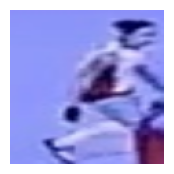

In [8]:
frame , label = data_loader[50]

label_idex = label.argmax().item()
print(f"{people_activity_clases[label_idex]}")

plt.figure(figsize=(2, 2)) 
plt.imshow(frame.permute(1,2,0))  # Converts from (C, H, W) to (H, W, C)
plt.axis('off')  # Optional: to hide axes
plt.show()

Standing


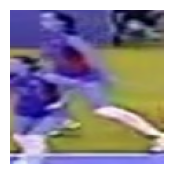

In [9]:
frame , label = data_loader[741]

label_idex = label.argmax().item()
print(f"{people_activity_clases[label_idex]}")

plt.figure(figsize=(2, 2)) 
plt.imshow(frame.permute(1,2,0))  # Converts from (C, H, W) to (H, W, C)
plt.axis('off')  # Optional: to hide axes
plt.show()

Standing


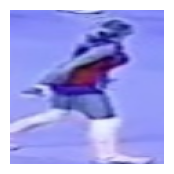

In [10]:
frame , label = data_loader[120]

label_idex = label.argmax().item()
print(f"{people_activity_clases[label_idex]}")

plt.figure(figsize=(2, 2)) 
plt.imshow(frame.permute(1,2,0))  # Converts from (C, H, W) to (H, W, C)
plt.axis('off')  # Optional: to hide axes
plt.show()

In [11]:
del data_loader

#### 2. Can return crop of player in the same clip (12 , 9, crop frame) , (tensor(12, 9, 9)) *needed for B5, B7*.

In [12]:
# transforms = v2.Compose([
#                 v2.ToPILImage(),    
#                 v2.Resize((28, 28)),
#                 v2.ToImage(), 
#                 v2.ToDtype(torch.float32, scale=True)
#             ])
transforms = A.Compose([
    A.Resize(112, 112),  
    ToTensorV2()
])


data_loader = Person_Activity_DataSet(videos_path, annot_path, split=train_spilt, seq=True, labels=person_activity_labels, transform=transforms)

In [13]:
len(data_loader)

629

In [14]:
clip, label = data_loader[310]

label.shape # (12 player , 9 frame , label of 9 class)

torch.Size([12, 9, 9])

In [15]:
label[0, 0, :]

tensor([0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=torch.float64)

In [16]:
clip.shape #  (12 player, 9 frame, C, H, W)

torch.Size([12, 9, 3, 112, 112])

Spiking


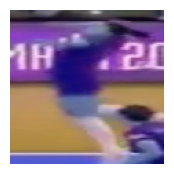

In [17]:
label_idex = label[0, 0].argmax().item()
print(f"{people_activity_clases[label_idex]}")

plt.figure(figsize=(2, 2)) # frist player  - first frame
plt.imshow(clip[0, 0].permute(1, 2, 0).numpy())  # Converts from (C, H, W) to (H, W, C)
plt.axis('off')  # Optional: to hide axes
plt.show()

Spiking


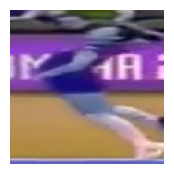

In [18]:
label_idex = label[0, 2].argmax().item()
print(f"{people_activity_clases[label_idex]}")

plt.figure(figsize=(2, 2)) # frist player  - Thrid frame
plt.imshow(clip[0, 2].permute(1, 2, 0).numpy())  # Converts from (C, H, W) to (H, W, C)
plt.axis('off')  
plt.show()

Spiking


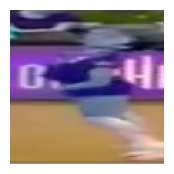

In [19]:
label_idex = label[0, 4].argmax().item()
print(f"{people_activity_clases[label_idex]}")

plt.figure(figsize=(2, 2)) 
plt.imshow(clip[0, 4].permute(1, 2, 0).numpy())  # Converts from (C, H, W) to (H, W, C)
plt.axis('off')  
plt.show()

Spiking


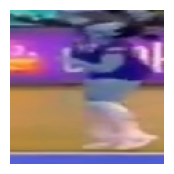

In [20]:
label_idex = label[0, 6].argmax().item()
print(f"{people_activity_clases[label_idex]}")

plt.figure(figsize=(2, 2)) 
plt.imshow(clip[0, 6].permute(1, 2, 0).numpy())  # Converts from (C, H, W) to (H, W, C)
plt.axis('off')  
plt.show()

Spiking


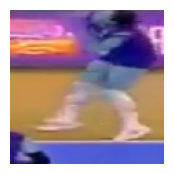

In [21]:
label_idex = label[0, 8].argmax().item()
print(f"{people_activity_clases[label_idex]}")

plt.figure(figsize=(2, 2)) # frist player  - last frame
plt.imshow(clip[0, 8].permute(1, 2, 0).numpy())  # Converts from (C, H, W) to (H, W, C)
plt.axis('off')  
plt.show()

Blocking


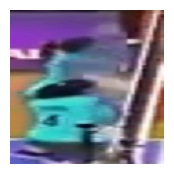

In [22]:
label_idex = label[1, 0].argmax().item()
print(f"{people_activity_clases[label_idex]}")

plt.figure(figsize=(2, 2))
plt.imshow(clip[1, 0].permute(1, 2, 0).numpy())  # Converts from (C, H, W) to (H, W, C)
plt.axis('off')  
plt.show()

Blocking


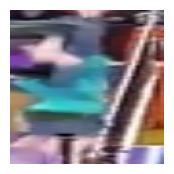

In [23]:
label_idex = label[1, 4].argmax().item()
print(f"{people_activity_clases[label_idex]}")

plt.figure(figsize=(2, 2))
plt.imshow(clip[1, 4].permute(1, 2, 0).numpy())  # Converts from (C, H, W) to (H, W, C)
plt.axis('off')  
plt.show()

Blocking


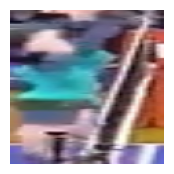

In [24]:
label_idex = label[1, 6].argmax().item()
print(f"{people_activity_clases[label_idex]}")

plt.figure(figsize=(2, 2)) 
plt.imshow(clip[1, 6].permute(1, 2, 0).numpy())  # Converts from (C, H, W) to (H, W, C)
plt.axis('off')  
plt.show()

Blocking


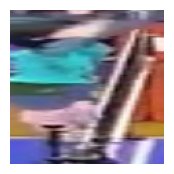

In [25]:
label_idex = label[1, 8].argmax().item()
print(f"{people_activity_clases[label_idex]}")

plt.figure(figsize=(2, 2)) # second player  - last frame
plt.imshow(clip[1, 8].permute(1, 2, 0).numpy())  # Converts from (C, H, W) to (H, W, C)
plt.axis('off')  
plt.show()


In [26]:
del data_loader

## Test Group Activity data loader

#### 1. Can return a full image of target frame with its group label (frame, tensor(8)) *needed for B1*. 

In [27]:
import torch

transforms = v2.Compose([
                v2.ToPILImage(),    
                v2.Resize((224, 224)),  
                v2.ToImage(), 
                v2.ToDtype(torch.float32, scale=True)
            ])

data_loader = Group_Activity_DataSet(videos_path, annot_path, split=train_spilt, crops=False , seq=False, labels=group_activity_labels, transform=transforms)

In [28]:
len(data_loader)

629

In [29]:
frame , label = data_loader[0]

In [30]:
print(label.shape) # (,8)
label 

torch.Size([8])


tensor([0., 0., 0., 0., 0., 1., 0., 0.], dtype=torch.float64)

In [31]:
frame.shape # (C, H , W)

torch.Size([3, 224, 224])

l-pass


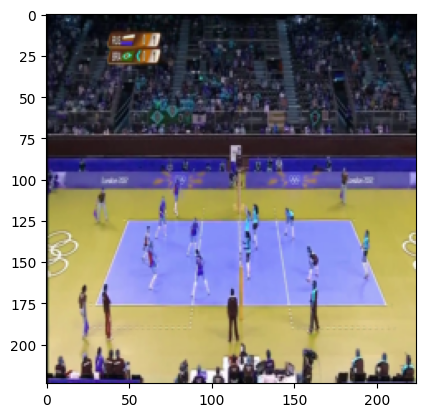

In [32]:
index = data_loader[0][1].argmax().item()
print(f"{group_activity_clases[index]}")

plt.imshow(data_loader[0][0].permute(1,2,0)) 
plt.show()

In [ ]:
index = data_loader[152][1].argmax().item()
print(f"{group_activity_clases[index]}")

plt.imshow(data_loader[152][0].permute(1,2,0))
plt.show()

#### 2. Can return a all player crops of the target frame with its group label (all player have same label)  ( (12, crop frame), tensor(1,8)) *needed for B3 step B, C*.

In [33]:
# transforms = v2.Compose([
#                 v2.ToPILImage(),    
#                 v2.Resize((28, 28)),  
#                 v2.ToImage(), 
#                 v2.ToDtype(torch.float32, scale=True)
#             ])

transforms = A.Compose([
    A.Resize(112, 112),  
    ToTensorV2()
])

data_loader= Group_Activity_DataSet(videos_path, annot_path, split=train_spilt, crops=True , seq=False, labels=group_activity_labels, transform=transforms)

In [34]:
len(data_loader) # the differents between case 1 and 2 the input consist of 12 bbox

629

In [35]:
frame_crops, label = data_loader[0]

In [36]:
print(label.shape) # (,8)
label

torch.Size([8])


tensor([0., 0., 0., 0., 0., 1., 0., 0.], dtype=torch.float64)

In [37]:
frame_crops.shape # (12, C, H, W) ---> 12 bbox of the frame

torch.Size([12, 3, 112, 112])

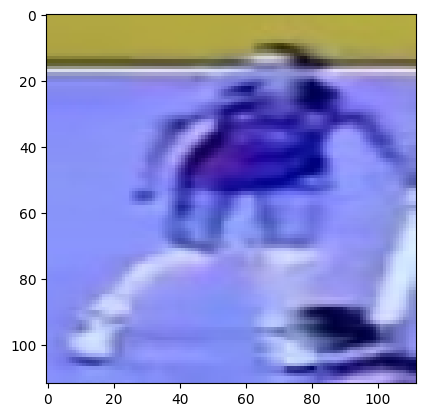

In [38]:
plt.imshow(frame_crops[0].permute(1,2,0))  # first bbox of the fraem
plt.show()

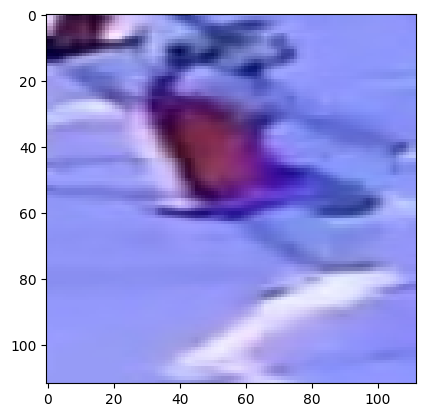

In [39]:
plt.imshow(frame_crops[11].permute(1,2,0))  # last bbox of the frame
plt.show()

In [40]:
del data_loader

#### 3. Can return a full clip with each frame dir with its group label (all the same) ((9, frame) , tensor(9,8)) *needed for B4*.

In [41]:
# transforms = v2.Compose([
#                 v2.ToPILImage(),    
#                 v2.Resize((224, 224)),  
#                 v2.ToImage(), 
#                 v2.ToDtype(torch.float32, scale=True)
#             ])

transforms = A.Compose([
    A.Resize(224, 224),  
    ToTensorV2()
])


data_loader = Group_Activity_DataSet(videos_path, annot_path, split=train_spilt, crops=False , seq=True, labels=group_activity_labels, transform=transforms)

In [42]:
len(data_loader)

629

In [43]:
clip , label = data_loader[100] 
clip.shape # (9 frames, C, H, W)

torch.Size([9, 3, 224, 224])

In [44]:
group_activity_labels

{'r_set': 0,
 'r_spike': 1,
 'r-pass': 2,
 'r_winpoint': 3,
 'l_winpoint': 4,
 'l-pass': 5,
 'l-spike': 6,
 'l_set': 7}

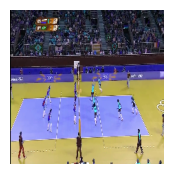

In [45]:
plt.figure(figsize=(2, 2)) # First frame
plt.imshow(clip[0].permute(1, 2, 0).numpy())  
plt.axis('off') 
plt.show()

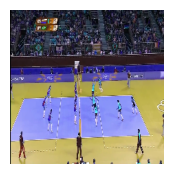

In [46]:
plt.figure(figsize=(2, 2)) # second frame
plt.imshow(clip[1].permute(1, 2, 0).numpy())  
plt.axis('off') 
plt.show()

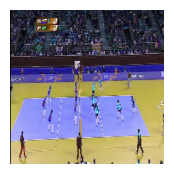

In [47]:
plt.figure(figsize=(2, 2)) 
plt.imshow(clip[2].permute(1, 2, 0).numpy())  
plt.axis('off') 
plt.show()

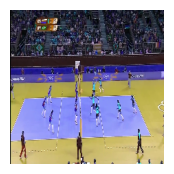

In [48]:
plt.figure(figsize=(2, 2)) 
plt.imshow(clip[3].permute(1, 2, 0).numpy())  
plt.axis('off') 
plt.show()

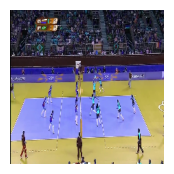

In [49]:
plt.figure(figsize=(2, 2)) 
plt.imshow(clip[4].permute(1, 2, 0).numpy())  
plt.axis('off') 
plt.show()

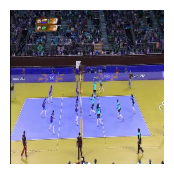

In [50]:
plt.figure(figsize=(2, 2)) 
plt.imshow(clip[5].permute(1, 2, 0).numpy())  
plt.axis('off') 
plt.show()

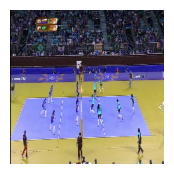

In [51]:
plt.figure(figsize=(2, 2)) 
plt.imshow(clip[6].permute(1, 2, 0).numpy())  
plt.axis('off') 
plt.show()

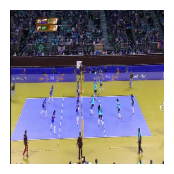

In [52]:
plt.figure(figsize=(2, 2)) 
plt.imshow(clip[7].permute(1, 2, 0).numpy())  
plt.axis('off') 
plt.show()

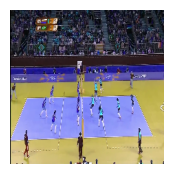

In [53]:
plt.figure(figsize=(2, 2)) # Last frame
plt.imshow(clip[8].permute(1, 2, 0).numpy())  
plt.axis('off') 
plt.show()

In [54]:
del data_loader

#### 4. Can return a full clip with all player crop with its group label (all the same) ((12, 9, crop frame), tensor(9,8)) *needed for B5, B6, B7, B8*.

In [55]:
# transforms = v2.Compose([
#                 v2.ToPILImage(),    
#                 v2.Resize((28, 28)),  
#                 v2.ToImage(), 
#                 v2.ToDtype(torch.float32, scale=True)
#             ])

transforms = A.Compose([
    A.Resize(112, 112),  
    ToTensorV2()
])

data_loader = Group_Activity_DataSet(videos_path, annot_path, split=train_spilt, crops=True , seq=True, labels=group_activity_labels, transform=transforms)

In [56]:
len(data_loader)

629

In [57]:
clip, label = data_loader[0]

In [58]:
label.shape # (9, 8) each frame has the same label

torch.Size([9, 8])

In [59]:
label

tensor([[0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.]], dtype=torch.float64)

In [60]:
clip.shape # (12, 9, C, H, W) 12 player , 9 frames, Channls , High, Width

torch.Size([12, 9, 3, 112, 112])

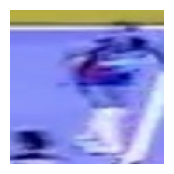

In [61]:
plt.figure(figsize=(2, 2)) # first player - first frame
plt.imshow(clip[0][0].permute(1, 2, 0).numpy())  
plt.axis('off') 
plt.show()

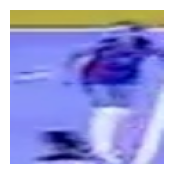

In [62]:
plt.figure(figsize=(2, 2)) # first player - first frame
plt.imshow(clip[0][1].permute(1, 2, 0).numpy())  
plt.axis('off') 
plt.show()

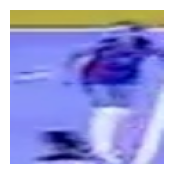

In [63]:
plt.figure(figsize=(2, 2)) # first player - first frame
plt.imshow(clip[0][1].permute(1, 2, 0).numpy())  
plt.axis('off') 
plt.show()

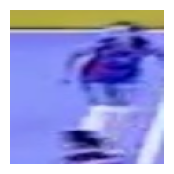

In [64]:
plt.figure(figsize=(2, 2)) # first player - first frame
plt.imshow(clip[0][2].permute(1, 2, 0).numpy())  
plt.axis('off') 
plt.show()

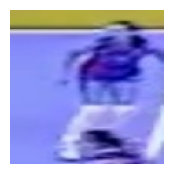

In [65]:
plt.figure(figsize=(2, 2)) # first player - first frame
plt.imshow(clip[0][3].permute(1, 2, 0).numpy())  
plt.axis('off') 
plt.show()

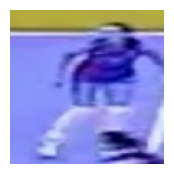

In [66]:
plt.figure(figsize=(2, 2)) # first player - first frame
plt.imshow(clip[0][4].permute(1, 2, 0).numpy())  
plt.axis('off') 
plt.show()

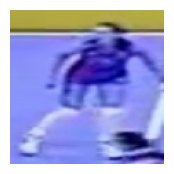

In [67]:
plt.figure(figsize=(2, 2)) # first player - first frame
plt.imshow(clip[0][5].permute(1, 2, 0).numpy())  
plt.axis('off') 
plt.show()

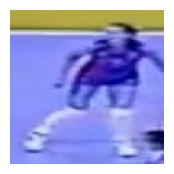

In [68]:
plt.figure(figsize=(2, 2)) # first player - first frame
plt.imshow(clip[0][6].permute(1, 2, 0).numpy())  
plt.axis('off') 
plt.show()

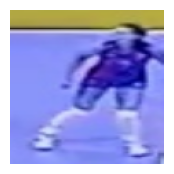

In [69]:
plt.figure(figsize=(2, 2)) # first player - first frame
plt.imshow(clip[0][7].permute(1, 2, 0).numpy())  
plt.axis('off') 
plt.show()

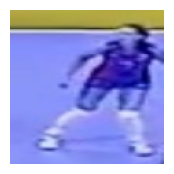

In [70]:
plt.figure(figsize=(2, 2)) # first player - first frame
plt.imshow(clip[0][8].permute(1, 2, 0).numpy())  
plt.axis('off') 
plt.show()